# Movie Recommender System
Dataset source: https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata?select=tmdb_5000_movies.csv


In [1]:
#Importing all required libraries 
import numpy as np
import pandas as pd
import ast
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
movies = pd.read_csv("tmdb_5000_movies.csv")
credits = pd.read_csv("tmdb_5000_credits.csv")
movies.head(1)
# credits.head(1)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [3]:
#We firstly need to merge the two datasete for a combined version to extract various fields from the dataset
movies = movies.merge(credits,on="title") #merging the contents on the bases of title 
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


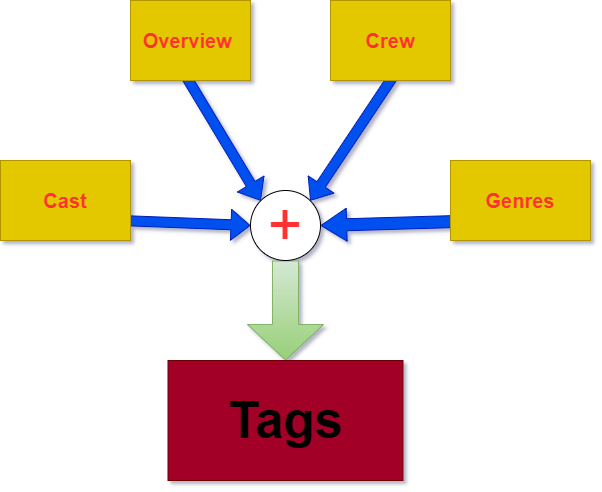

In [4]:
#Removing unwanted Fields from the dataset to simply data to processes later
# fields required are: genres , id , keywords , original_title , overview , crew , cast


movies = movies[['genres',"id", 'keywords','original_title','overview','cast','crew']]
# movies.info

In [24]:
# preprocessing of data
def genres(obj):
    gen = []
    for i in ast.literal_eval(obj):
        gen.append(i['name'])
    return gen

# movies['genres'] = movies['genres'].apply(genres)

ValueError: malformed node or string: ['[', '{', '"', 'i', 'd', '"', ':', '', '2', '8', ',', '', '"', 'n', 'a', 'm', 'e', '"', ':', '', '"', 'A', 'c', 't', 'i', 'o', 'n', '"', '}', ',', '', '{', '"', 'i', 'd', '"', ':', '', '1', '2', ',', '', '"', 'n', 'a', 'm', 'e', '"', ':', '', '"', 'A', 'd', 'v', 'e', 'n', 't', 'u', 'r', 'e', '"', '}', ',', '', '{', '"', 'i', 'd', '"', ':', '', '1', '4', ',', '', '"', 'n', 'a', 'm', 'e', '"', ':', '', '"', 'F', 'a', 'n', 't', 'a', 's', 'y', '"', '}', ',', '', '{', '"', 'i', 'd', '"', ':', '', '8', '7', '8', ',', '', '"', 'n', 'a', 'm', 'e', '"', ':', '', '"', 'S', 'c', 'i', 'e', 'n', 'c', 'e', '', 'F', 'i', 'c', 't', 'i', 'o', 'n', '"', '}', ']']

In [6]:
movies.dropna(inplace=True)

In [7]:
# movies.head(1)
# similarly we repeat the same process for keywords, cast and crew
movies['keywords'].head(1).values

def keywords(obj):
    gen = []
    for i in ast.literal_eval(obj):
        gen.append(i['name'])
    return gen

movies['keywords']=movies['keywords'].apply(keywords)

In [8]:
movies.head(1)

,genres,id,keywords,original_title,overview,cast,crew
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[culture clash, future, space war, space colon...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [9]:
movies['cast'][0]
def cast(obj):
    cnt = 0
    cast = []
    for i in ast.literal_eval(obj):
        if cnt != 3:
            cast.append(i['name'])
            cnt += 1
        else:
            break
            
    return cast

# movies['cast'].apply(cast)
movies['cast'] = movies['cast'].apply(cast)
# print('.')

In [10]:
movies.head(1)


,genres,id,keywords,original_title,overview,cast,crew
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[culture clash, future, space war, space colon...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [11]:
movies['crew'][0]
def director(obj):
    director = []
    for i in ast.literal_eval(obj):
        if i['job'] == "Director":
            director.append(i['name'])
            break
    return director

# movies['crew'].apply(director)
movies['crew'] = movies['crew'].apply(director)

In [12]:
movies.head(1)

,genres,id,keywords,original_title,overview,cast,crew
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[culture clash, future, space war, space colon...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]


In [13]:
# movies['overview'][0]
# movies['overview'].apply(lambda j:j.split())
movies.head()

,genres,id,keywords,original_title,overview,cast,crew
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[culture clash, future, space war, space colon...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[spy, based on novel, secret agent, sequel, mi...",Spectre,A cryptic message from Bond’s past sends him o...,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[dc comics, crime fighter, terrorist, secret i...",The Dark Knight Rises,Following the death of District Attorney Harve...,"[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[based on novel, mars, medallion, space travel...",John Carter,"John Carter is a war-weary, former military ca...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [14]:
movies['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [15]:
movies.dropna(inplace=True)
# movies['overview'].apply(lambda x:x.split())

In [16]:
movies['overview']= movies['overview'].apply(lambda x:x.split())

In [17]:
#Fixing any issues due to spacing between any two attributes
#eg: sam harrington would turn into 2 different tags --> 'sam', 'harrington'
movies['genres'] = movies['genres'].apply(lambda x:[i.replace(" ", "") for i in x])
movies['keywords'] = movies['keywords'].apply(lambda x:[i.replace(" ", "") for i in x])
movies['cast'] = movies['cast'].apply(lambda x:[i.replace(" ", "") for i in x])
movies['crew'] = movies['crew'].apply(lambda x:[i.replace(" ", "") for i in x])

movies.head(1)

,genres,id,keywords,original_title,overview,cast,crew
0,"[[, {, "", i, d, "", :, , 2, 8, ,, , "", n, a, m,...",19995,"[cultureclash, future, spacewar, spacecolony, ...",Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]


In [18]:
#creating a combined fields 
movies['tagz'] = movies['genres'] + movies['keywords'] + movies['overview'] + movies['cast'] + movies['crew']
movies.head(1)

,genres,id,keywords,original_title,overview,cast,crew,tagz
0,"[[, {, "", i, d, "", :, , 2, 8, ,, , "", n, a, m,...",19995,"[cultureclash, future, spacewar, spacecolony, ...",Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[[, {, "", i, d, "", :, , 2, 8, ,, , "", n, a, m,..."


In [19]:
#creating a new data set with only the required fields (id , name , tags)
updted_movies = movies[["id","original_title", "tagz"]]
updted_movies.head(1)

,id,original_title,tagz
0,19995,Avatar,"[[, {, "", i, d, "", :, , 2, 8, ,, , "", n, a, m,..."


In [20]:
updted_movies['tagz'].apply(lambda x: ' '.join(x))

0       [ { " i d " :  2 8 ,  " n a m e " :  " A c t i...
1       [ { " i d " :  1 2 ,  " n a m e " :  " A d v e...
2       [ { " i d " :  2 8 ,  " n a m e " :  " A c t i...
3       [ { " i d " :  2 8 ,  " n a m e " :  " A c t i...
4       [ { " i d " :  2 8 ,  " n a m e " :  " A c t i...
                              ...                        
4804    [ { " i d " :  2 8 ,  " n a m e " :  " A c t i...
4805    [ { " i d " :  3 5 ,  " n a m e " :  " C o m e...
4806    [ { " i d " :  3 5 ,  " n a m e " :  " C o m e...
4807    [ ] When ambitious New York attorney Sam is se...
4808    [ { " i d " :  9 9 ,  " n a m e " :  " D o c u...
Name: tagz, Length: 4806, dtype: object

In [21]:
# updted_movies['tagz'][0]
# df.columns= df.columns.str.lower()
# updted_movies['tagz'].apply(lambda x:x.lower())     #facing error due to x.lower instead we implement a short 

def low(obj):
    l = []
    for i in obj:
        l.append(i.lower())
    return l

# print(low(updted_movies['tagz'][0]))

updted_movies['tagz'] = updted_movies['tagz'].apply(low)

C:\Users\lbs19\AppData\Local\Temp/ipykernel_2504/914889618.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updted_movies['tagz'] = updted_movies['tagz'].apply(low)


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, stop_words='english')
# max features denates the maximum number of words 

In [23]:
# vectors = 

cv.fit_transform(updted_movies['tagz']).toarray()

AttributeError: 'list' object has no attribute 'lower'